In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [10]:
print(trades.columns)
print(sentiment.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [12]:
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['Timestamp'].dt.date


In [13]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [14]:
sentiment['classification'] = sentiment['classification'].str.strip().str.title()


In [15]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [16]:
merged[['date','classification']].head()


,date,classification
0,2024-10-27,Greed
1,2024-10-27,Greed
2,2024-10-27,Greed
3,2024-10-27,Greed
4,2024-10-27,Greed


In [17]:
merged['trade_volume'] = merged['Execution Price'] * abs(merged['Size Tokens'])


In [18]:
merged['is_profitable'] = merged['Closed PnL'] > 0


In [19]:
daily = merged.groupby(['date','classification']).agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_fee=('Fee', 'mean'),
    total_volume=('trade_volume', 'sum'),
    win_rate=('is_profitable', 'mean'),
    trade_count=('Trade ID', 'count')
).reset_index()


In [27]:
daily.to_csv("daily_trader_metrics.csv", index=False)


In [29]:
import os
os.makedirs("outputs", exist_ok=True)


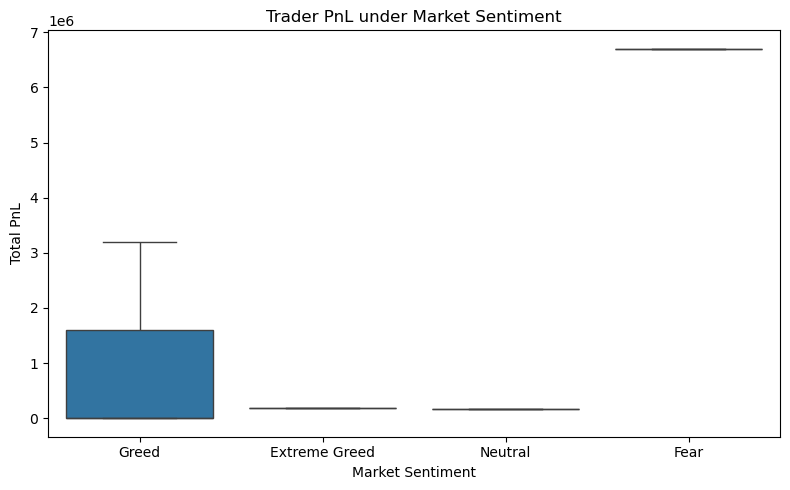

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='total_pnl', data=daily)
plt.title("Trader PnL under Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total PnL")
plt.tight_layout()
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()


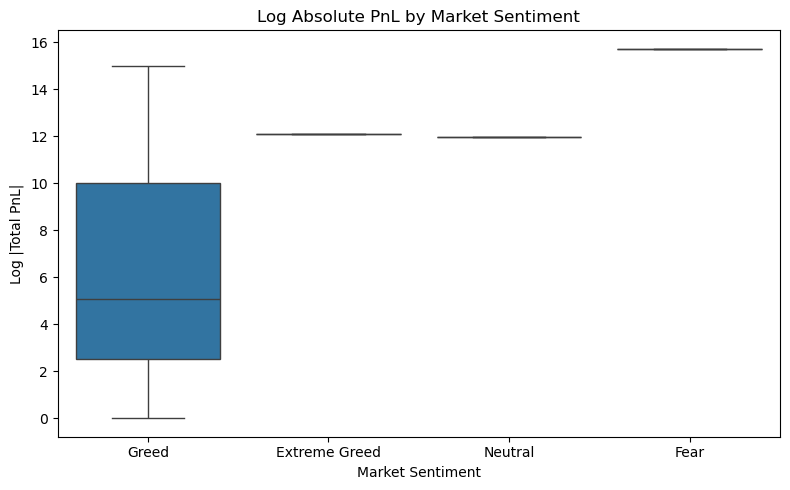

In [31]:
daily['log_abs_pnl'] = np.log1p(abs(daily['total_pnl']))

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='log_abs_pnl', data=daily)
plt.title("Log Absolute PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Log |Total PnL|")
plt.tight_layout()
plt.savefig("outputs/log_pnl_vs_sentiment.png")
plt.show()


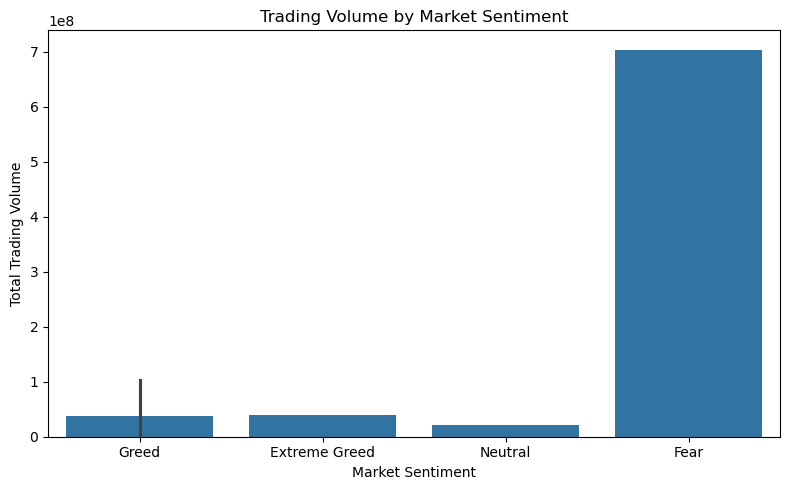

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='total_volume', data=daily)
plt.title("Trading Volume by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Trading Volume")
plt.tight_layout()
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()


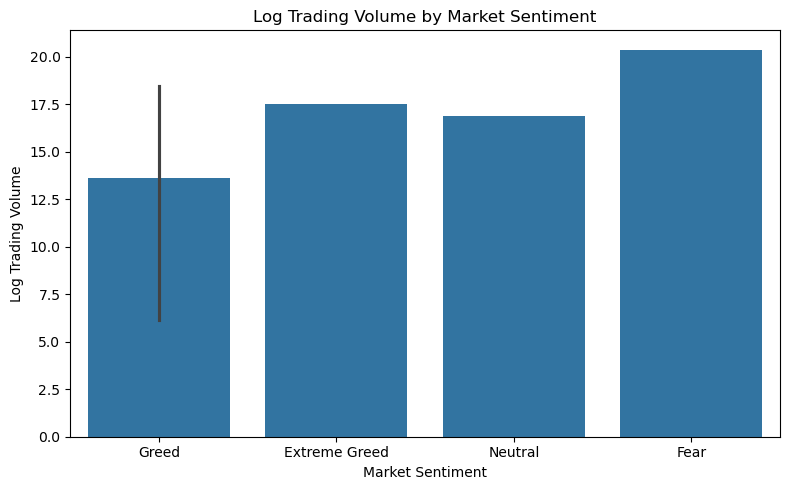

In [33]:
daily['log_volume'] = np.log1p(daily['total_volume'])

plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='log_volume', data=daily)
plt.title("Log Trading Volume by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Log Trading Volume")
plt.tight_layout()
plt.savefig("outputs/log_volume_vs_sentiment.png")
plt.show()


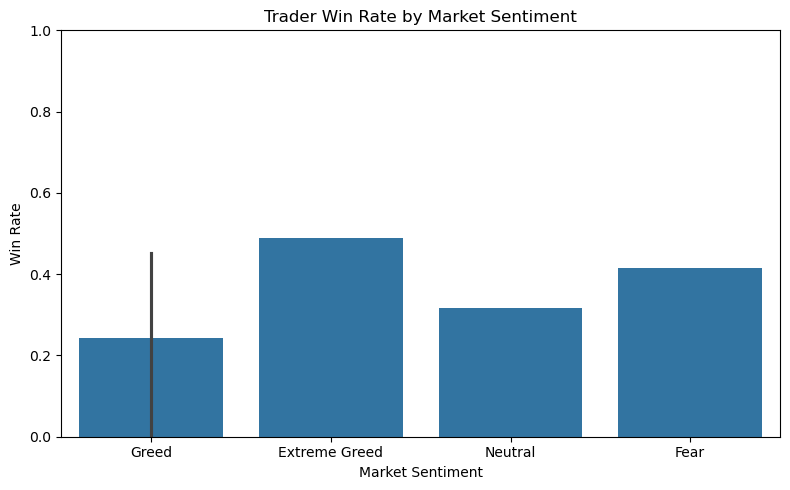

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='win_rate', data=daily)
plt.title("Trader Win Rate by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("outputs/win_rate_vs_sentiment.png")
plt.show()


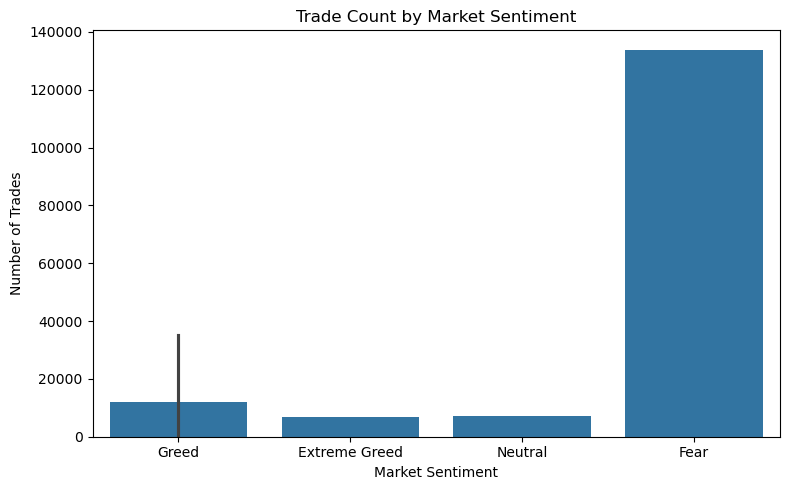

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='trade_count', data=daily)
plt.title("Trade Count by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.savefig("outputs/trade_count_vs_sentiment.png")
plt.show()
